In [1]:
# import libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# re-size all images to 224 by 224
IMAGE_SIZE = [224, 224]

traindata_path = '/content/drive/MyDrive/CarBrand/Train'
testdata_path = '/content/drive/My Drive/CarBrand/Test'


In [4]:
#Transfer leanring - use weights from pre-trained models (pre-trained on ImageNet datasets)
#Add Resnet50 library and add preprocessing layer to the front of ResNet50. Imagenet weights are used.
# [3] is RGB channel - height, width and RGB channel.

#Initialize ResNet50
resnet50_model = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) # Don't have last layer (1000 categories) 
                                                                                        # and first layer(existing dataset, becasue we're having our own)

94773248/94765736 [==============================] - 1s 0us/step


In [5]:
resnet50_model.summary()

#last block will no longer have 1000 categories

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [6]:
# Don't train existing weights, reuse existing weights from the initialization step
for layer in resnet50_model.layers:
  layer.trainable = False

In [7]:
# Get number of folders (output) using glob function

folders_op =glob('/content/drive/My Drive/CarBrand/Train/*')

In [8]:
#Flatten the input (output from resnet initialisation)
flat_ip = Flatten()(resnet50_model.output)

In [9]:
pred_op = Dense(len(folders_op), activation='softmax')(flat_ip) #3 output categories

model = Model(inputs=resnet50_model.input, outputs=pred_op)

In [10]:
model.summary()

#last layer (Dense) will have 3 nodes

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [11]:
#compile the model - determine what cost and optimize method to use

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [12]:
#Import and augment images (create new images and zoom, flip, etc) from dataset using ImageGeenrator
#do image scaling, etc. (each existing block has height, width and RGB value)
train_datagen = ImageDataGenerator(
    rescale=1./255,  #scaling technique: divide all pixesl by 255 (all pixels range between 0 to 255)
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)  #just scaling for test data, no augmentation

In [13]:
#Read data from directory using flow_from_directory function from ImageDatagen

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/CarBrand/Train',
                                                 target_size=(224,224), 
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 64 images belonging to 3 classes.


In [14]:
# for test
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/CarBrand/Test',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 58 images belonging to 3 classes.


In [15]:
#Fit the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


#Epochs will start running

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 15s 8s/step - loss: 4.9351 - accuracy: 0.2344 - val_loss: 13.9436 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 1s 353ms/step - loss: 9.4489 - accuracy: 0.3906 - val_loss: 1.4575 - val_accuracy: 0.5517
Epoch 3/50
2/2 [==============================] - 1s 360ms/step - loss: 3.5163 - accuracy: 0.3750 - val_loss: 4.6875 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 1s 361ms/step - loss: 4.7445 - accuracy: 0.3281 - val_loss: 3.3917 - val_accuracy: 0.3448
Epoch 5/50
2/2 [==============================] - 1s 360ms/step - loss: 2.5787 - accuracy: 0.4531 - val_loss: 1.3195 - val_accuracy: 0.4828
Epoch 6/50
2/2 [==============================] - 1s 354ms/step - loss: 2.2220 - accuracy: 0.4062 - val_loss: 3.0890 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 1s 356ms/step - loss: 1.6344 - accu

In [16]:
r.history

{'accuracy': [0.234375,
  0.390625,
  0.375,
  0.328125,
  0.453125,
  0.40625,
  0.484375,
  0.5625,
  0.578125,
  0.65625,
  0.46875,
  0.5625,
  0.65625,
  0.6875,
  0.6875,
  0.71875,
  0.734375,
  0.765625,
  0.78125,
  0.796875,
  0.734375,
  0.828125,
  0.875,
  0.828125,
  0.859375,
  0.875,
  0.84375,
  0.859375,
  0.921875,
  0.953125,
  0.875,
  0.9375,
  0.875,
  0.875,
  0.953125,
  0.78125,
  0.875,
  0.859375,
  0.890625,
  0.90625,
  0.859375,
  0.921875,
  0.875,
  0.890625,
  0.875,
  0.8125,
  0.921875,
  0.828125,
  0.84375,
  0.859375],
 'loss': [4.935054302215576,
  9.448944091796875,
  3.5163354873657227,
  4.744507312774658,
  2.5786585807800293,
  2.2219951152801514,
  1.6343883275985718,
  1.8277649879455566,
  2.5171375274658203,
  1.1983224153518677,
  1.4397501945495605,
  0.9727354645729065,
  1.3394819498062134,
  1.066564917564392,
  0.6825913190841675,
  0.6766993403434753,
  0.6750192642211914,
  0.7141767740249634,
  0.45172739028930664,
  0.533864200

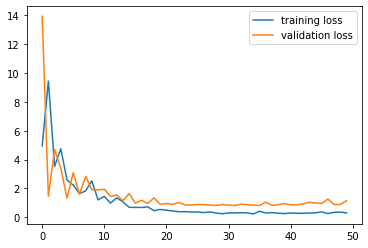

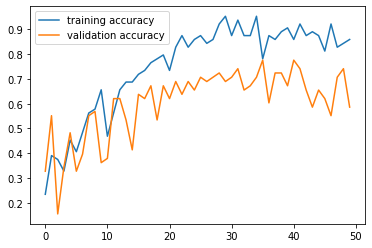

<Figure size 432x288 with 0 Axes>

In [17]:
#Plot the loss
plt.plot(r.history['loss'], label='training loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('Train_val_Loss')

#Plot the accuracy
plt.plot(r.history['accuracy'], label='training accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()
plt.savefig('train_val_acc')


In [18]:
#Save the model as h5 file - file of HDF (Hierarchical data format - stores as multi dimensional data)
from tensorflow.keras.models import load_model
model.save('carModel_resnet50.h5')

In [19]:
#Prediction for test data

y_pred = model.predict(test_set)

In [20]:
y_pred

#Gives pobablility of each class (alphabetical order - audi, lamborgini, mercedes)

array([[5.70840299e-01, 3.18091244e-01, 1.11068442e-01],
       [8.05068016e-02, 3.57421428e-01, 5.62071800e-01],
       [4.08307947e-02, 8.20235536e-02, 8.77145648e-01],
       [3.17551568e-02, 6.40948653e-01, 3.27296197e-01],
       [3.28885168e-02, 7.30938852e-01, 2.36172602e-01],
       [3.33304144e-02, 3.30402493e-01, 6.36267126e-01],
       [7.85686970e-02, 8.35142359e-02, 8.37917030e-01],
       [4.58206832e-02, 8.03914741e-02, 8.73787820e-01],
       [3.53831127e-02, 1.63523830e-03, 9.62981641e-01],
       [1.41865928e-02, 3.07366827e-05, 9.85782623e-01],
       [5.34298420e-02, 1.77575767e-01, 7.68994451e-01],
       [5.17882034e-03, 9.37721729e-01, 5.70995249e-02],
       [9.42322969e-01, 5.10035232e-02, 6.67350739e-03],
       [5.35549879e-01, 3.16858408e-03, 4.61281598e-01],
       [6.66160556e-03, 2.69696728e-04, 9.93068695e-01],
       [7.82176971e-01, 7.15771243e-02, 1.46245882e-01],
       [3.23650390e-02, 3.47306162e-01, 6.20328784e-01],
       [3.43899685e-03, 8.05303

In [21]:
#Take the value of index with highest probability using np.argmax
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2,
       0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2])

In [23]:
#Prediction for new dataset
img = image.load_img('/content/drive/My Drive/CarBrand/Test/lamborghini/10.jpg', target_size=(224,224))


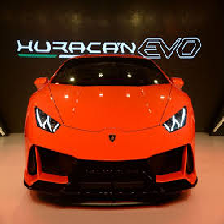

In [24]:
img

In [25]:
#COnvert image int array, ImageDataGenerator does the same
img_arr = image.img_to_array(img)
img_arr

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [26]:
img_arr.shape

(224, 224, 3)

In [27]:
#Divide by 255 for new data. THis was done for rescaling original data too
img_arr = img_arr/255
img_arr

array([[[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        ...,
        [0.05098039, 0.00784314, 0.        ],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.07058824, 0.03137255, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        [0.07450981, 0.03529412, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       ...,

       [[0.81960785, 0.5058824 , 0.36078432],
        [0.8235294 , 0.50980395, 0.3647059 ],
        [0.83137256, 0

In [28]:
#Expand the dimensions
img_arr=np.expand_dims(img_arr,axis=0)
img_data=preprocess_input(img_arr)
img_data.shape

(1, 224, 224, 3)

In [29]:
#Predict the output
model.predict(img_data)

array([[0.04760369, 0.05568726, 0.896709  ]], dtype=float32)

In [30]:
#argmax - to pick the max probability value
a=np.argmax(model.predict(img_data),axis=1)

In [31]:
a

array([2])